In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Read in data file

In [117]:
data = pd.read_table("./ex1/ex1data1.txt", delimiter=',',  header=None, names=['population', 'profit'],)

In [118]:
print(data.shape)
data.head()

(97, 2)


,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


### Plot out Population vs Profit

Text(0,0.5,'Profit in $10,000s')

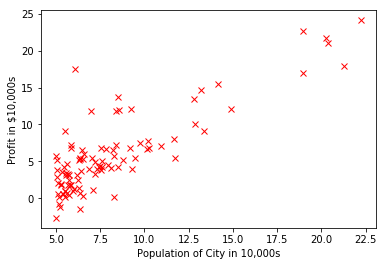

In [119]:
plt.plot(data['population'], data['profit'], 'rx')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

### Pre-processing

In [120]:
X = np.vstack([np.ones(data.shape[0]), data['population']]).T
Y = np.array(data['profit'])

In [121]:
## parameters
THETA = np.zeros(2)
ITERATIONS = 1500
ALPHA = 0.01

## Linear Regression

### Cost Function

In [122]:
def costFunc(x, y, theta):
    y_res = y - np.dot(x, theta)
    return np.dot(y_res, y_res) / (2 * len(y))

In [123]:
print(costFunc(X, Y, THETA))

32.0727338775


### Gradient Descent Function

In [124]:
def gradientDescent(x, y, theta, alpha, iteration):
    THRESHOLD = 1e-3
    step = 0
    update = np.ones(theta.shape) * 1e2
    print("Initial Cost: {}".format(costFunc(x, y, theta)))
    while update.any() >= THRESHOLD and step < iteration:
        # note order of y_hat and y matters here!!!
        y_res = np.dot(x, theta) - y
        update = alpha * np.dot(x.T, y_res) / (2 * len(y)) 
        theta -= update
        step += 1
        if step % 100 == 0:
            print("Round {} Cost: {}".format(step, costFunc(x, y, theta)))
    print("Round {} Cost: {}".format(step, costFunc(x, y, theta)))
    return theta 

In [125]:
min_theta = gradientDescent(X, Y, THETA, ALPHA, ITERATIONS)

Initial Cost: 32.07273387745567
Round 100 Cost: 5.678390338059282
Round 200 Cost: 5.480138843699031
Round 300 Cost: 5.31460171148593
Round 400 Cost: 5.1763805988039575
Round 500 Cost: 5.060967967597758
Round 600 Cost: 4.964600088744215
Round 700 Cost: 4.884134302827429
Round 800 Cost: 4.816946534659923
Round 900 Cost: 4.760845719389208
Round 1000 Cost: 4.714002349533667
Round 1100 Cost: 4.674888812790316
Round 1200 Cost: 4.642229574966662
Round 1300 Cost: 4.614959583448872
Round 1400 Cost: 4.592189534698936
Round 1500 Cost: 4.573176873116837
Round 1500 Cost: 4.573176873116837


In [126]:
print(min_theta)

[-2.86779958  1.08976177]


### Predict

In [127]:
def predict(x, theta):
    return np.dot(x, theta)

In [128]:
x1 = np.array([1, 3.5])
print(predict(x1, min_theta))

0.946366624099


In [129]:
x2 = np.array([1, 7])
print(predict(x2, min_theta))

4.76053282738


### Plot Estimated Function

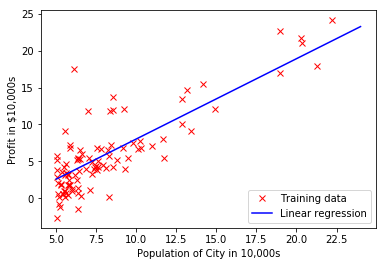

In [130]:
x_pop = np.linspace(5, 24, X.shape[0])
y_hat = min_theta[0] + min_theta[1] * x_pop

plt.plot(X[:,1], Y, 'rx', label="Training data")
plt.plot(x_pop, y_hat, 'b-', label="Linear regression")
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.legend(loc='lower right')

### Visualize Cost

In [131]:
N1 = 100
N2 = 100
theta_0_vals = np.linspace(-10, 10, N1)
theta_1_vals = np.linspace(-1, 4, N2)

In [132]:
J_vals = np.zeros([N1, N2])

for i in range(N1):
    for j in range(N2):
        t = np.array([theta_0_vals[i], theta_1_vals[j]])
        J_vals[i, j] = costFunc(X, Y, t)

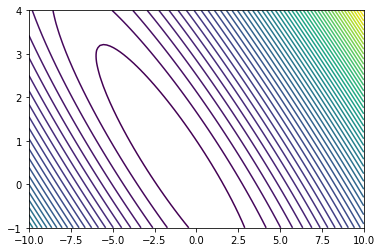

In [133]:
plt.contour(theta_0_vals, theta_1_vals, J_vals, 50)

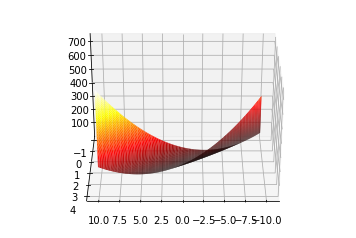

In [134]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta_0_vals, theta_1_vals, J_vals, cmap='hot')
ax.view_init(azim=90)

## Multivariate Linear Regression

In [135]:
df = pd.read_table("./ex1/ex1data2.txt", delimiter=",", header=None, names=["size", "nbedrooms", "price"])

In [136]:
print(df.shape)
df.head()

(47, 3)


,size,nbedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [137]:
def featureNormalize(x, usecols=None):
    if usecols is not None:
        data = x[usecols]
    else:
        data = x.copy()
    
    mean_vals = data.mean()
    std_vals = data.std() + 1e-8
    data = (data - mean_vals) / std_vals
    return (data, mean_vals, std_vals)    

In [138]:
class SimpleLinearRegression:
    
    def __init__(self, learning_rate=0.95, iteration=500, normalize=False, verbose=50):
        self.mean_vals = None
        self.std_vals = None
        self.threshold = 1e-3
        self.normalize = normalize
        self.learning_rate = learning_rate
        self.iteration = iteration
        self.verbose = verbose
        self.cost_trajectory = []
        
    def train(self, data, xcols, ycol, method="gradientDescent"):
        X, Y = self.initParms(data, xcols, ycol)
        if method not in ["gradientDescent", "normalEquation"]:
            raise ValueError("Method argument only supports <gradientDescent> or <normalEquation>.")
        if method == "normalEquation":
            self.normalize = False
        X = self.preprocess(X, normalize=self.normalize, predict=False)
            
        cost = self.costFunc(X, Y, self.theta)
        self.cost_trajectory.append(cost)
        print("Initial Cost: {}".format(cost))
        
        if method == "gradientDescent":
            step = 0
            while self.update.any() >= self.threshold and step < self.iteration:
                self.update = self.gradientDescent(x=X, y=Y, theta=self.theta, 
                                                   learning_rate=self.learning_rate)
                self.theta -= self.update
                cost = self.costFunc(X, Y, self.theta)
                self.cost_trajectory.append(cost)
                step += 1
                if (self.verbose > 0) and (step % self.verbose == 0):
                    print("Round {} Cost: {}".format(step, cost))
            print("Finished at Step {} Cost: {}".format(step, cost))
        elif method == "normalEquation":
            normalMat = np.linalg.inv(np.dot(X.T, X) + 1e-8)
            self.theta = np.dot(normalMat, np.dot(X.T, Y))
            print("Min Cost: {}".format(self.costFunc(X, Y, self.theta)))
        return
    
    def train_normal(self, data, xcols, ycol):
        X, Y = self.initParms(data, xcols, ycol)
        X = self.preprocess(X, normalize=False, predict=False)
    
    def predict(self, x):
        if isinstance(x, list):
            x = np.array(x).reshape(-1, len(self.xcols))
        elif isinstance(x, pd.core.frame.DataFrame):
            x = np.array(x[self.xcols])
        x = self.preprocess(x, normalize=self.normalize, predict=True)
        return np.dot(x, self.theta)
    
    def initParms(self, data, xcols, ycol):
        self.xcols = xcols
        self.ycol = ycol
        m = len(xcols) + 1
        self.theta = np.zeros(m)
        self.update = np.ones(m) * 100
        x = np.array(data[xcols])
        y = np.array(data[ycol])
        return (x, y)

    def preprocess(self, x, normalize=False, predict=False):
        if normalize:
            if not predict:
                self.mean_vals = x.mean()
                self.std_vals = x.std() + 1e-8
                print("Normalized features to mean 0 and standard deviation 1.")
            x = (x - self.mean_vals) / self.std_vals
        x = np.hstack([np.ones(x.shape[0]).reshape(-1,1), x])
        return x
        
    def plotCost(self):
        assert len(self.cost_trajectory) > 0, "Please train model first."
        x = list(range(len(self.cost_trajectory)))
        plt.plot(x, self.cost_trajectory)
        plt.xlabel("Number of Iterations")
        plt.ylabel("Cost J")
        plt.show()
        return
        
    def costFunc(self, x, y, theta):
        y_res = y - np.dot(x, theta)
        return np.dot(y_res, y_res) / (2 * len(y))
    
    def gradientDescent(self, x, y, theta, learning_rate):
        # note order of y_hat and y matters here!!!
        y_res = np.dot(x, theta) - y
        return learning_rate * np.dot(x.T, y_res) / (2 * len(y)) 

In [139]:
model1 = SimpleLinearRegression(learning_rate=0.1, iteration=50, normalize=True, verbose=0)
model1.train(df, xcols=["size", "nbedrooms"], ycol="price", method="gradientDescent")

Normalized features to mean 0 and standard deviation 1.
Initial Cost: 65591548106.45744
Finished at Step 50 Cost: 2075679684.187265


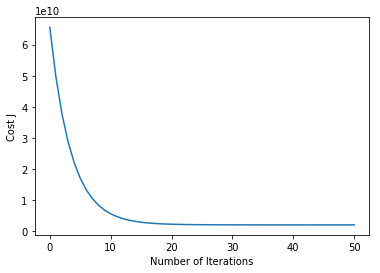

In [140]:
model1.plotCost()

In [141]:
model1.predict([1650, 3])

array([ 297147.98101861])

In [142]:
model2 = SimpleLinearRegression(learning_rate=0.1, iteration=50, normalize=True, verbose=0)
model2.train(df, xcols=["size", "nbedrooms"], ycol="price", method="normalEquation")

Initial Cost: 65591548106.45744
Min Cost: 2043280050.602829


In [143]:
model2.predict([1650, 3])

array([ 293081.46429898])